In [7]:
import fastf1

In [9]:
session = fastf1.get_session(2021, 'Monaco Grand Prix', 'R')

In [8]:
session_results = session.results

In [ ]:
session_results.info()

In [ ]:
session_results.iloc[0]

In [20]:
columns_to_keep = ['DriverNumber', 'BroadcastName', 'DriverId', 'FullName','TeamName', 'GridPosition', 'Position', 'ClassifiedPosition','Time','Status','Points']


In [21]:
cleaned_results = session_results[columns_to_keep]

In [29]:
# Get the current column order
cols = cleaned_results.columns.tolist()

# Specify the new order with 'year' and 'race' at the beginning
new_order = ['year', 'race'] + [col for col in cols if col not in ['year', 'race']]

# Reorder the DataFrame columns
df = cleaned_results[new_order]

In [47]:
import pandas as pd

In [81]:
final_race_df.to_csv('final_race_df.csv', index=False)

In [13]:
df_2021_only.describe()

,year,GridPosition,Position,Time,Points
count,460.0,459.000000,459.000000,215,460.000000
mean,2021.0,10.045752,10.479303,0 days 00:10:43.563265116,4.981522
std,0.0,5.867541,5.761746,0 days 00:30:06.220720156,7.159343
min,2021.0,0.000000,1.000000,0 days 00:00:00.745000,0.000000
25%,2021.0,5.000000,5.500000,0 days 00:00:17.862500,0.000000
50%,2021.0,10.000000,10.000000,0 days 00:00:47.434000,0.250000
75%,2021.0,15.000000,15.000000,0 days 00:01:16.854000,8.000000
max,2021.0,20.000000,20.000000,0 days 02:13:36.410000,26.000000


In [19]:
final_race_df_no_2019 = final_race_df_no_2019[final_race_df_no_2019['year'] != 2021]

In [33]:
columns_to_keep = ['DriverNumber', 'BroadcastName', 'DriverId', 'FullName','TeamName', 'GridPosition', 'Position', 'ClassifiedPosition','Time','Status','Points']
df_2023_only = pd.DataFrame()

for year in range(2023, 2024):
    schedule = fastf1.get_event_schedule(year)
    races = schedule['EventName']

    for race in races:
        session = fastf1.get_session(year, race, 'R')
        session.load()
        session_results = session.results
        cleaned_results = session_results[columns_to_keep]
        cleaned_results['year'] = year  # Replace with the actual year you want
        cleaned_results['race'] = race # Replace with the actual race name
        cols = cleaned_results.columns.tolist()
        new_order = ['year', 'race'] + [col for col in cols if col not in ['year', 'race']]

        cleaned_results = cleaned_results[new_order]

        df_2023_only = pd.concat([df_2023_only, cleaned_results], ignore_index=True)


            

events      WARNING 	Correcting user input 'Pre-Season Testing' to 'British Grand Prix'
core           INFO 	Loading data for British Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/10/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ayush/Documents/F1-DataDive/F1DataDive/lib/python3.12/site-packages/urllib3/connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/Users/ayush/Documents/F1-DataDive/F1DataDive/lib/python3.12/site-packages/urllib3/connection.py", line 507, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/http/client.py", line 1428, in getresponse
    response.begin()
  F

In [3]:
import pandas as pd

In [23]:
final_race_df_w_2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                2682 non-null   int64  
 1   race                2682 non-null   object 
 2   DriverNumber        2682 non-null   object 
 3   BroadcastName       1160 non-null   object 
 4   DriverId            2682 non-null   object 
 5   FullName            2682 non-null   object 
 6   TeamName            2682 non-null   object 
 7   GridPosition        2682 non-null   float64
 8   Position            2682 non-null   float64
 9   ClassifiedPosition  2682 non-null   object 
 10  Time                1253 non-null   object 
 11  Status              2682 non-null   object 
 12  Points              2682 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 272.5+ KB


In [4]:
final_race_df = pd.read_pickle("final_race_df.pkl")

In [6]:
final_race_df_no_2019 = pd.read_csv("finalrace_df_no_2019.csv")

In [21]:
# Group by 'year' and count unique races for each year
race_count_per_year = df_2022_only.groupby('year')['race'].nunique()

# Display the result
print(race_count_per_year)

year
2022    23
Name: race, dtype: int64


In [73]:
filtered_df = final_race_df[final_race_df['year'] == 2017]

In [74]:
unique_race_count = filtered_df['race'].nunique()
print(f"Number of unique races: {unique_race_count}")

Number of unique races: 19


In [28]:
schedule = fastf1.get_event_schedule(2023)
filtered_schedule = schedule['EventName'].nunique()
print(filtered_schedule)

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


ValueError: Failed to load any schedule data.

In [43]:
column_data = schedule['EventName']

In [45]:
column_data = column_data[1:]

In [46]:
column_data

1            Bahrain Grand Prix
2     Emilia Romagna Grand Prix
3         Portuguese Grand Prix
4            Spanish Grand Prix
5             Monaco Grand Prix
6         Azerbaijan Grand Prix
7             French Grand Prix
8            Styrian Grand Prix
9           Austrian Grand Prix
10           British Grand Prix
11         Hungarian Grand Prix
12           Belgian Grand Prix
13             Dutch Grand Prix
14           Italian Grand Prix
15           Russian Grand Prix
16           Turkish Grand Prix
17     United States Grand Prix
18       Mexico City Grand Prix
19         São Paulo Grand Prix
20             Qatar Grand Prix
21     Saudi Arabian Grand Prix
22         Abu Dhabi Grand Prix
Name: EventName, dtype: object

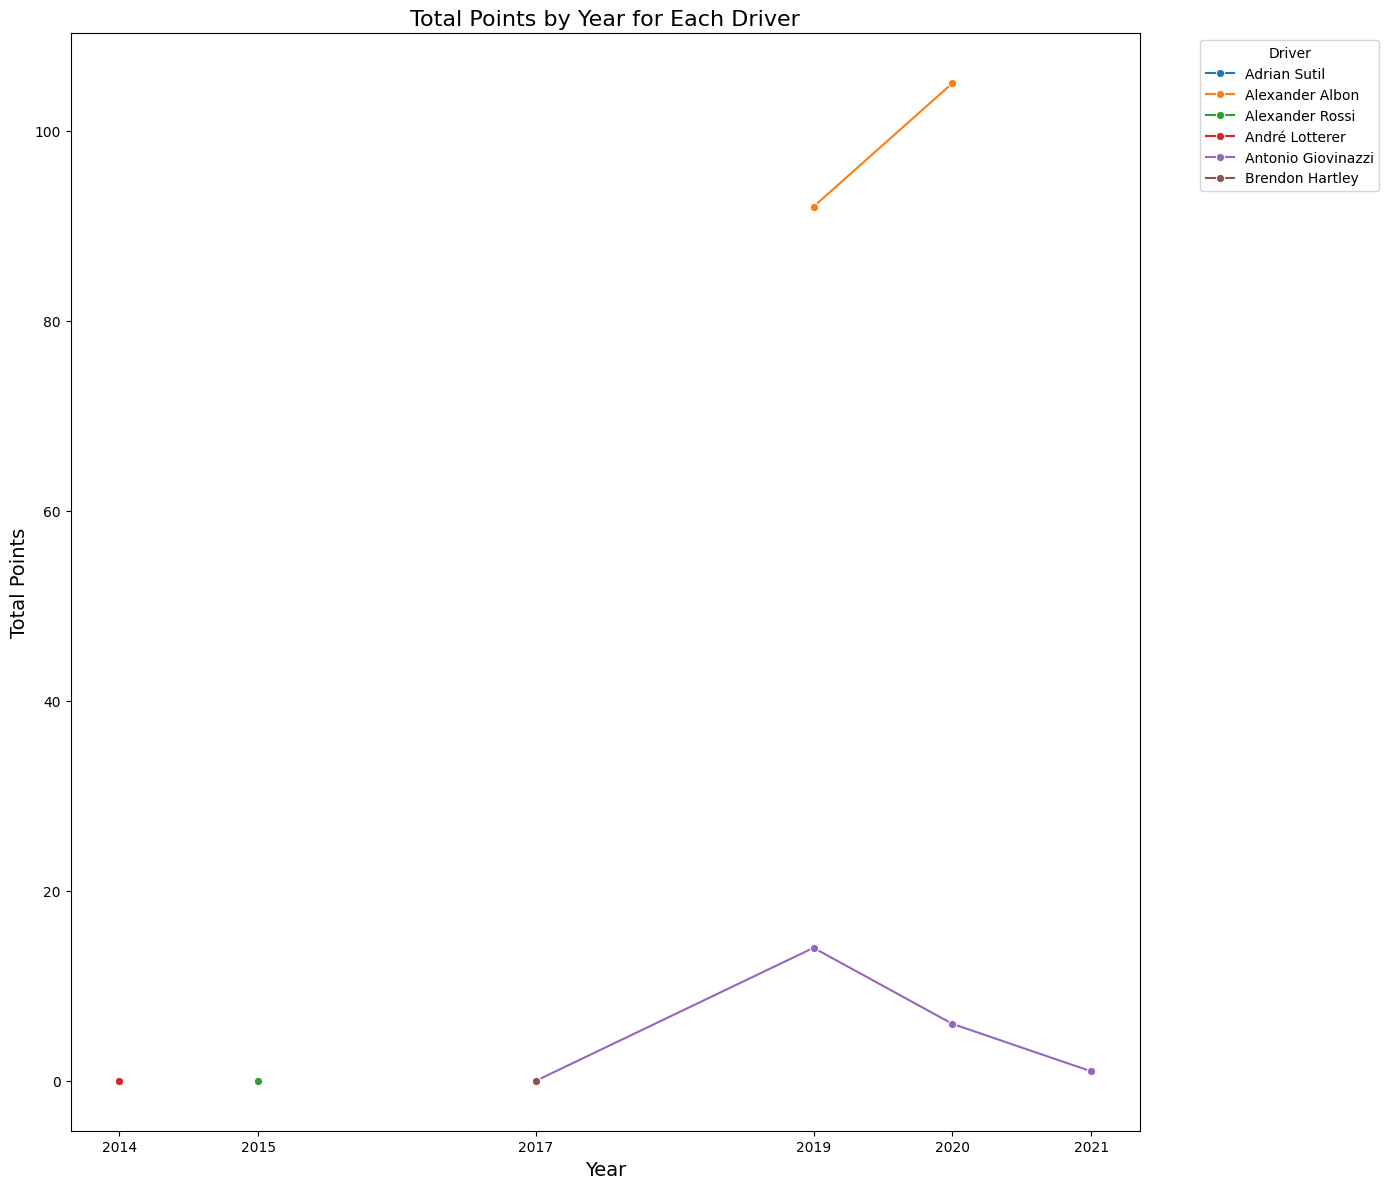

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from CSV file
df = pd.read_csv('finalrace_df_no_2019.csv')

# Ensure 'year' column is of integer type
df['year'] = df['year'].astype(int)

# Calculate total points per driver per year
points_per_year = df.groupby(['FullName', 'year'])['Points'].sum().reset_index()

# Get a list of unique drivers
drivers = points_per_year['FullName'].unique()

# Create the line plot
plt.figure(figsize=(14, 12))
line_plot = sns.lineplot(
    data=points_per_year,
    x='year',
    y='Points',
    hue='FullName',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Total Points by Year for Each Driver', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(points_per_year['year'].unique())  # Ensure all years are shown on x-axis
plt.tight_layout()

# Display the plot
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from CSV file
df = pd.read_csv('finalrace_df_2021.csv')

df.describe()

,year,DriverNumber,GridPosition,Position,Points
count,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000
mean,2017.204854,26.559243,10.566738,10.746253,4.989293
std,2.069863,24.665116,5.967364,5.933482,7.246998
min,2014.000000,1.000000,0.000000,1.000000,0.000000
25%,2015.000000,8.000000,5.000000,6.000000,0.000000
50%,2017.000000,19.000000,11.000000,11.000000,0.000000
75%,2019.000000,33.000000,16.000000,16.000000,8.000000
max,2021.000000,99.000000,22.000000,22.000000,50.000000


In [37]:
# Group by 'year' and count unique races for each year
race_count_per_year = df_2023.groupby('year')['race'].nunique()

# Display the result
print(race_count_per_year)

year
2014    16
2015    18
2016    20
2017    19
2018    20
2019    20
2020    18
2021    23
2022    23
2023    23
Name: race, dtype: int64


In [15]:
df_2021_only.info()

<class 'fastf1.core.SessionResults'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   year                460 non-null    int64          
 1   race                460 non-null    object         
 2   DriverNumber        460 non-null    object         
 3   BroadcastName       460 non-null    object         
 4   DriverId            460 non-null    object         
 5   FullName            460 non-null    object         
 6   TeamName            460 non-null    object         
 7   GridPosition        459 non-null    float64        
 8   Position            459 non-null    float64        
 9   ClassifiedPosition  460 non-null    object         
 10  Time                215 non-null    timedelta64[ns]
 11  Status              460 non-null    object         
 12  Points              460 non-null    float64        
dtypes: float64(3), int64(1), object(8), 

In [5]:
df_2020 = df[df['year'] != 2021]

In [30]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2682 entries, 0 to 2681
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                2682 non-null   int64  
 1   race                2682 non-null   object 
 2   DriverNumber        2682 non-null   int64  
 3   BroadcastName       1160 non-null   object 
 4   DriverId            2682 non-null   object 
 5   FullName            2682 non-null   object 
 6   TeamName            2682 non-null   object 
 7   GridPosition        2682 non-null   float64
 8   Position            2682 non-null   float64
 9   ClassifiedPosition  2682 non-null   object 
 10  Time                1253 non-null   object 
 11  Status              2682 non-null   object 
 12  Points              2682 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 293.3+ KB


In [35]:
df_2023 = pd.concat([df_2023_only, df_2022], ignore_index=True)

In [36]:
df_2023.to_csv('race_till_2023.csv', index=False)